Design a two-layer MLP to create a decision boundary as belows.

Note that the pentagon decision boundary goes through 5 points (0.2, 0.7), (0.3, 0.2), (0.5, 1.0), (0.7, 0.2), and (0.8, 0.7).

Data items inside and on the edges of the pentagon are considered class 1. Otherwise, they are considered class 0.

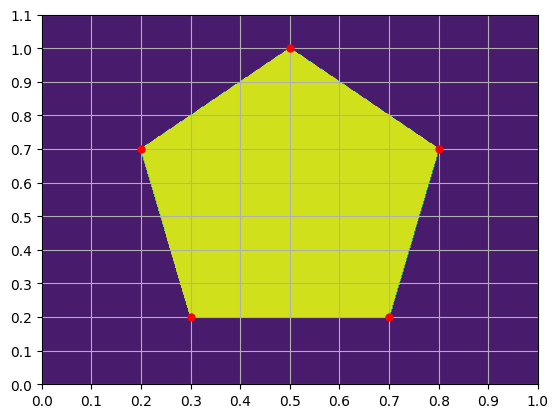

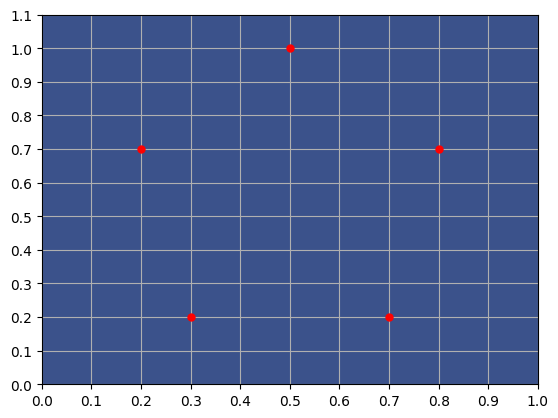

In [3]:
# THAM KHẢO
# Show that 2 layer MLP (with manually chosen weights) can solve the XOR problem
# Based on
# https://github.com/ageron/handson-ml2/blob/master/10_neural_nets_with_keras.ipynb


import numpy as np
import matplotlib.pyplot as plt


def activation(z):
    return np.double(z >= 0)

def mlp(x1, x2):
    # Trọng số và bias cho lớp ẩn
    w1 = np.array([[-10, 20], [10, -20], [10, 20], [-10, -20], [-20, 0]])
    b1 = np.array([15, -5, -25, 25, 5])

    # Trọng số và bias cho lớp output
    w2 = np.array([1, 1, 1, 1, 1])
    b2 = -4

    # Tính toán lớp ẩn
    z1 = activation(np.dot(np.c_[x1.ravel(), x2.ravel()], w1.T) + b1)

    # Tính toán lớp output
    z2 = activation(np.dot(z1, w2) + b2)

    return z2.reshape(x1.shape)


x1s = np.linspace(0.0, 1.0, 500)
x2s = np.linspace(0.0, 1.1, 500)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp(x1, x2)


plt.figure()

plt.contourf(x1, x2, z1)
plt.plot([0.2, 0.3, 0.5, 0.7, 0.8], [0.7, 0.2, 1.0, 0.2, 0.7], "ro", markersize=5)

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.yticks(np.arange(0.0, 1.2, step=0.1))
plt.grid(True)
plt.show()

7/7 [==============================] - 0s 2ms/step
Độ chính xác: 91.00%
450/450 [==============================] - 1s 2ms/step


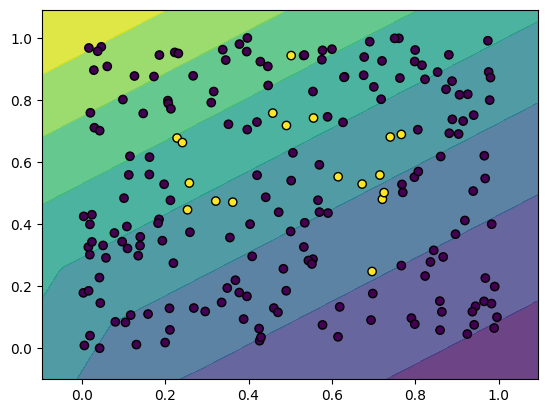

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Định nghĩa các đỉnh của ngũ giác
dinh_ngu_giac = np.array([[0.2, 0.7], [0.3, 0.2], [0.5, 1.0], [0.7, 0.2], [0.8, 0.7]])

# Hàm kiểm tra nếu một điểm nằm trong ngũ giác
def diem_trong_ngu_giac(diem, dinh):
    from matplotlib.path import Path
    duong_di = Path(dinh)
    return duong_di.contains_point(diem)

# Tạo tập dữ liệu
np.random.seed(0)
du_lieu = np.random.rand(1000, 2)
nhan = np.array([diem_trong_ngu_giac(diem, dinh_ngu_giac) for diem in du_lieu]).astype(int)

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(du_lieu, nhan, test_size=0.2, random_state=42)

# Tạo mô hình MLP
model = Sequential()
model.add(Dense(8, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Biên dịch mô hình
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Đánh giá mô hình
y_pred = (model.predict(X_test) > 0.5).astype(int)
do_chinh_xac = accuracy_score(y_test, y_pred)
print(f"Độ chính xác: {do_chinh_xac * 100:.2f}%")

# Vẽ biên quyết định
def ve_bien_quyet_dinh(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.show()

ve_bien_quyet_dinh(model, X_test, y_test)
